## Priori Balancing Notebook
---

In this notebook we will focus on priori data balancing. This means that we focus on the raw audio data and try to balance the classes by cutting audios, removing outliers and augmenting the data.

1. [Load Data](#Load-Data)
2. [Data Distribution](#Data-Distribution)
3. [Data Balancing](#Data-Balancing) ([Cutting Audios](#Cutting-Audios) - [Removing Outliers](#Removing-Outliers) - [Augmenting Data](#Augmenting-Data))

In [1]:
# import all the functions
from utils import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#### 1. Load Data <a id='Load-Data'></a>

In [2]:
# paths to the features and the labels
FEATURES_RAW_DIR = '../features/raw/'

BASE_PATH = "../dataset/"
SAMPLE_RATE = 22050

metadata = pd.read_csv(BASE_PATH + "/metadata.csv")
annotation = pd.read_csv(BASE_PATH + "/annotation.csv")
lables = pd.read_csv(BASE_PATH + "/labels.csv")

audio_info= pd.merge(metadata, lables, on='filename')

sns.set_theme(context="paper", font_scale=1)

#### 2. Data Distribution <a id='Data-Distribution'></a>

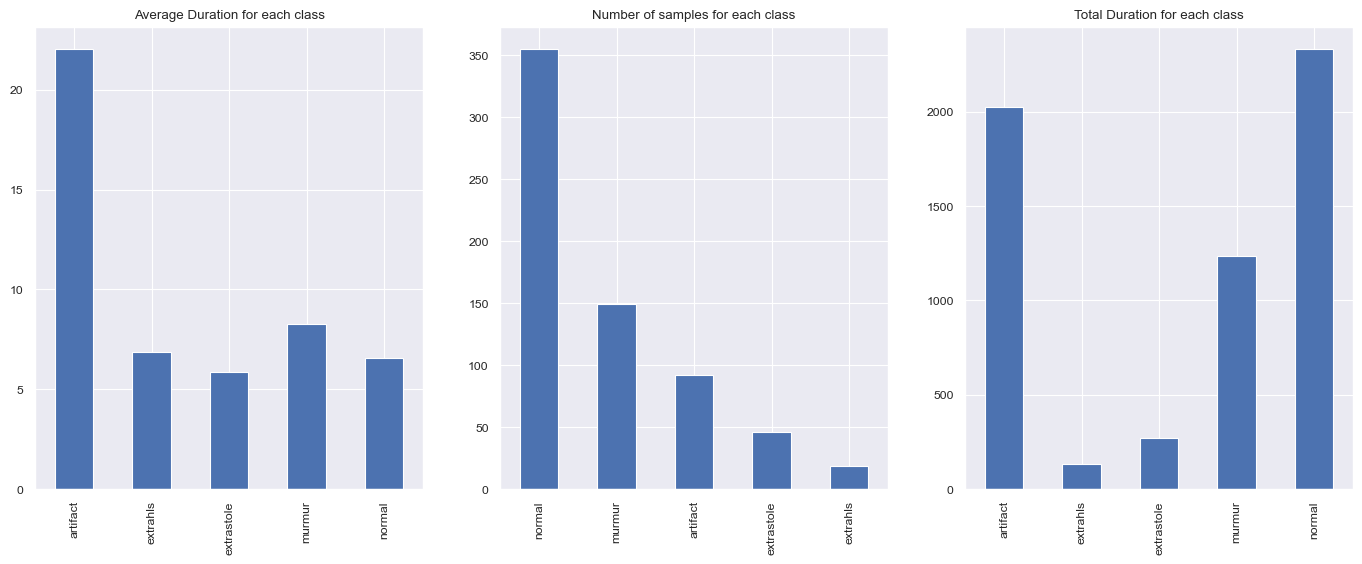

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

# avg duraton for each class
audio_info.groupby('label')['duration'].mean().plot.bar(ax = axs[0], title='Average Duration for each class')
_ = axs[0].set_xlabel('')

# number of samples for each class
audio_info['label'].value_counts().plot.bar(ax = axs[1], title='Number of samples for each class')
_ = axs[1].set_xlabel('')

# total duration for each class
audio_info.groupby('label')['duration'].sum().plot.bar(ax = axs[2], title='Total Duration for each class')
_ = axs[2].set_xlabel('')

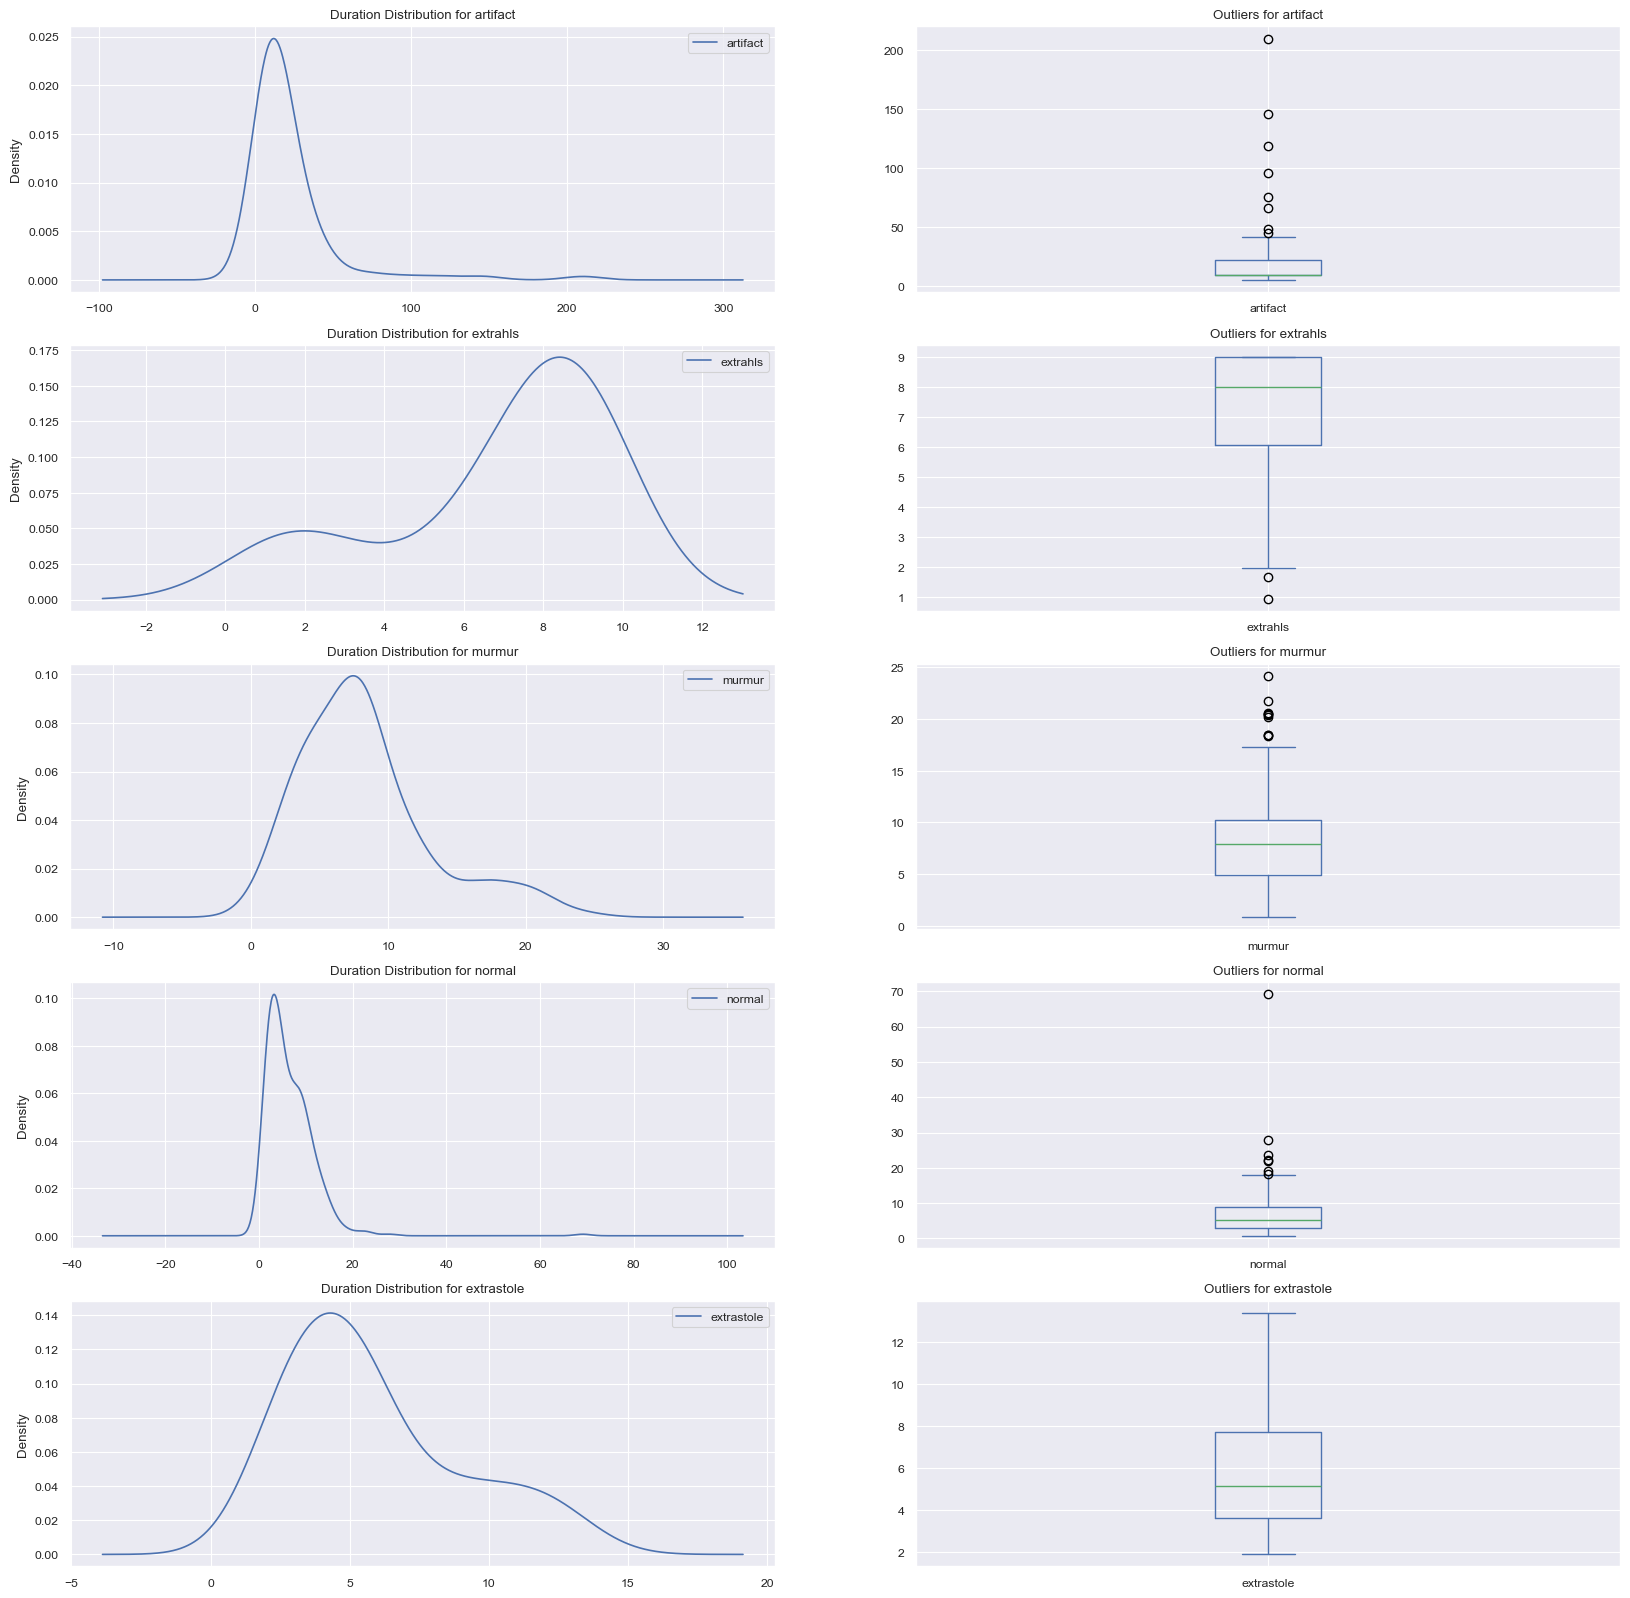

In [4]:
# duration distribution
names = audio_info['label'].unique()
fig, axs = plt.subplots(len(names), 2, figsize=(20, 20))

for i, name in enumerate(names):
	audio_info[audio_info['label']== name].groupby('label')['duration'].plot(legend=True, title=f'Duration Distribution for {name}', kind='kde', ax = axs[i][0])
	audio_info[audio_info['label']== name].groupby('label')['duration'].plot(legend=True, title=f'Outliers for {name}', kind='box', ax = axs[i][1])

#### 3. Data Balancing <a id='Data-Balancing'></a>

##### 3.1 Cutting Audios <a id='Cutting-Audios'></a>

##### 3.2 Removing Outliers <a id='Removing-Outliers'></a>

In [5]:
# Calculate the quantiles for each label
Q1 = audio_info.groupby('label')['duration'].apply(lambda x: x.quantile(0.25))
Q3 = audio_info.groupby('label')['duration'].apply(lambda x: x.quantile(0.75))

# Calculate the IQR for each label
IQR = Q3 - Q1

# Find the outliers for each label using IQR
outliers = audio_info.groupby('label').apply(lambda x: x[(x['duration'] < (Q1[x.name] - 1.5 * IQR[x.name])) | (x['duration'] > (Q3[x.name] + 1.5 * IQR[x.name]))])

artifact_out = outliers[outliers['label']=='artifact']['filename'].to_list()

# drop the outliers
audio_info_outliers = audio_info[~audio_info['filename'].isin(artifact_out)]

##### 3.3 Augmenting Data <a id='Augmenting-Data'></a>